In [132]:
import matplotlib.pyplot as plt
import os
import json

In [133]:
def find_json_file(root_folder):
    json_file_path = None
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.json'):
                if json_file_path is not None:
                    raise Exception("More than one JSON file found.", root_folder)
                json_file_path = os.path.join(root, file)
    if json_file_path is None:
        raise FileNotFoundError(f"No JSON file found: {root_folder}")
    return json_file_path

def read_json_file(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def get_task_accuracies(data, tasks):
    accuracies = {}
    results = data.get("results", {})
    for task in tasks:
        task_data = results.get(task)
        if task_data:
            acc = task_data.get("acc,none")
            if acc is not None:
                accuracies[task] = acc
            else:
                print(f"'acc,none' key not found for '{task}'.")
        else:
            print(f"Task '{task}' not found in results.")
    return accuracies, 100 * sum(accuracies.values()) / len(accuracies.keys())

In [134]:
model_mappings_135m = {}
epochs = [575, 1150, 1725, 2300, 2875]
obj_types = ['dpo', 'simpo', 'mmpo']
len_norms = ['yes', 'no']
entropies = ['yes', 'no']
betas = [0.01, 0.05, 0.1, 0.5]

for epoch_idx, epoch_num in enumerate(epochs):
    for obj_type in obj_types:
        for len_norm in len_norms:
            for entp in entropies:
                for beta in betas:
                    model_key = f"135m-{obj_type}-epoch_{epoch_idx+1}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                    if obj_type == "dpo":
                        model_value = f"lm_harness_output_smollm2-135M-orca_bin_ultra-offline-dpo-beta_{beta}-lr_0.0005-avg_logps_{len_norm}-v4_checkpoint-{epoch_num}"
                    elif obj_type == "simpo":
                        model_value = f"lm_harness_output_smollm2-135M-orca_bin_ultra-offline-simpo-beta_{beta}-lr_0.0001-gamma-to-beta_1.6-avg_logps_{len_norm}-v4_checkpoint-{epoch_num}"
                    elif obj_type == "mmpo":
                        model_value = f"lm_harness_output_smollm2-135M-orca_bin_ultra-offline-mmpo-beta_{beta}-lr_0.0005-reward_eps_0.9-avg_logps_{len_norm}-v4-{entp}-entropy_checkpoint-{epoch_num}"
                    else:
                        raise Exception(f"not supported obj_type: {obj_type}")
                    model_mappings_135m[model_key] = model_value

model_mappings_135m['135-sft']  = 'lm_harness_output_smollm2_135M_sft_checkpoint-14378'

In [135]:
model_mappings_360m = {}
epochs = [575, 1150, 1725, 2300, 2875]
obj_types = ['dpo', 'simpo', 'mmpo']
len_norms = ['yes', 'no']
entropies = ['yes', 'no']
betas = [0.01, 0.05, 0.1, 0.5]

for epoch_idx, epoch_num in enumerate(epochs):
    for obj_type in obj_types:
        for len_norm in len_norms:
            for entp in entropies:
                for beta in betas:
                    model_key = f"360m-{obj_type}-epoch_{epoch_idx+1}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                    if obj_type == "dpo":
                        model_value = f"lm_harness_output_smollm2-360M-orca_bin_ultra-offline-dpo-beta_{beta}-lr_0.00005-avg_logps_{len_norm}-v4_checkpoint-{epoch_num}"
                    elif obj_type == "simpo":
                        model_value = f"lm_harness_output_smollm2-360M-orca_bin_ultra-offline-simpo-beta_{beta}-lr_0.0001-gamma-to-beta_1.6-avg_logps_{len_norm}-v4_checkpoint-{epoch_num}"
                    elif obj_type == "mmpo":
                        model_value = f"lm_harness_output_smollm2-360M-orca_bin_ultra-offline-mmpo-beta_{beta}-lr_0.0005-reward_eps_0.9-avg_logps_{len_norm}-v4-{entp}-entropy_checkpoint-{epoch_num}"
                    else:
                        raise Exception(f"not supported obj_type: {obj_type}")
                    model_mappings_360m[model_key] = model_value

model_mappings_360m['360-sft'] = 'lm_harness_output_smollm2_360M_sft_checkpoint-28758'

In [136]:
model_mappings_llama_1b = {}
epochs = [1530, 3060, 4590, 6120, 7650]
obj_types = ['dpo', 'simpo', 'mmpo']
len_norms = ['yes', 'no']
entropies = ['yes', 'no']
betas = [0.01, 0.05, 0.1, 0.5]

for epoch_idx, epoch_num in enumerate(epochs):
    for obj_type in obj_types:
        for len_norm in len_norms:
            for entp in entropies:
                for beta in betas:
                    model_key = f"llama3.2_1b-{obj_type}-epoch_{epoch_idx+1}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                    if obj_type == "dpo":
                        model_value = f"lm_harness_output_llama3.2-1b-offline-dpo-beta_{beta}-lr_0.0005-avg_logps_{len_norm}-v13_checkpoint-{epoch_num}"
                    elif obj_type == "simpo":
                        model_value = f"lm_harness_output_llama3.2-1b-offline-simpo-beta_{beta}-lr_0.0005-gamma-to-beta_1.0-avg_logps_{len_norm}-v13_checkpoint-{epoch_num}"
                    elif obj_type == "mmpo":
                        model_value = f"lm_harness_output_llama3.2-1b-offline-mmpo-beta_{beta}-lr_0.0005-reward_eps_0.9-avg_logps_{len_norm}-v13-{entp}-entropy_checkpoint-{epoch_num}"
                    else:
                        raise Exception(f"not supported obj_type: {obj_type}")
                    model_mappings_llama_1b[model_key] = model_value

model_mappings_llama_1b['llama3.2-sft'] = 'lm_harness_output_llama3.2-1b-sftdatasetv3-sft-checkpoint-111000'

In [137]:
model_mappings_llama_8b = {}
epochs = [1530, 3060, 4590, 6120, 7650]
obj_types = ['dpo', 'simpo', 'mmpo']
len_norms = ['no']
entropies = ['no']
betas = [0.01, 0.05, 0.5]

for epoch_idx, epoch_num in enumerate(epochs):
    for obj_type in obj_types:
        for len_norm in len_norms:
            for entp in entropies:
                for beta in betas:
                    model_key = f"llama3_8b-{obj_type}-epoch_{epoch_idx+1}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                    if obj_type == "dpo":
                        model_value = f"lm_harness_output_llama3-8b-offline-dpo-beta_{beta}-lr_0.00001-avg_logps_{len_norm}-v1_checkpoint-{epoch_num}"
                    elif obj_type == "simpo":
                        model_value = f"lm_harness_output_llama3-8b-offline-simpo-beta_{beta}-lr_0.0001-gamma-to-beta_1.0-avg_logps_{len_norm}-v1_checkpoint-{epoch_num}"
                    elif obj_type == "mmpo":
                        model_value = f"lm_harness_output_llama3-8b-offline-mmpo-beta_{beta}-lr_0.0001-reward_eps_0.9-avg_logps_{len_norm}-v1-{entp}-entropy_checkpoint-{epoch_num}"
                    else:
                        raise Exception(f"not supported obj_type: {obj_type}")
                    model_mappings_llama_8b[model_key] = model_value

model_mappings_llama_8b['llama3-8b'] = 'lm_harness_output_Llama-3-Base-8B-SFT'

In [138]:
root_folder = "/home/saeednjf/lm-evaluation-harness/training_logs/v4-runs"
tasks = ["winogrande", "arc_easy", "piqa", "hellaswag", "openbookqa", "arc_challenge", "mmlu", "mathqa", "race", "commonsense_qa"]

In [139]:
model_lm_harness_avg_scores_360m = {}
for model_id, model_file in model_mappings_360m.items():
    model_folder = f"{root_folder}/{model_file}"
    json_file_path = find_json_file(model_folder)
    # print(f"JSON file found: {json_file_path}")

    # Read the content of the found JSON file.
    data = read_json_file(json_file_path)

    # Extract accuracies for the predefined tasks.
    accuracies, avg = get_task_accuracies(data, tasks)
    model_lm_harness_avg_scores_360m[model_id] = avg

In [140]:
root_folder = "/home/saeednjf/lm-evaluation-harness/training_logs/v4-runs"
tasks = ["winogrande", "arc_easy", "piqa", "hellaswag", "openbookqa", "arc_challenge", "mmlu", "mathqa", "race", "commonsense_qa"]

In [141]:
model_lm_harness_avg_scores_135m = {}
for model_id, model_file in model_mappings_135m.items():
    model_folder = f"{root_folder}/{model_file}"
    json_file_path = find_json_file(model_folder)
    # print(f"JSON file found: {json_file_path}")

    # Read the content of the found JSON file.
    data = read_json_file(json_file_path)

    # Extract accuracies for the predefined tasks.
    accuracies, avg = get_task_accuracies(data, tasks)
    model_lm_harness_avg_scores_135m[model_id] = avg

In [142]:
root_folder = "/home/saeednjf/lm-evaluation-harness/training_logs/llama3.2-v13"
tasks = ["winogrande", "arc_easy", "piqa", "hellaswag", "openbookqa", "arc_challenge", "mmlu", "mathqa", "race", "commonsense_qa"]

In [143]:
model_lm_harness_avg_scores_llama_1b = {}
for model_id, model_file in model_mappings_llama_1b.items():
    model_folder = f"{root_folder}/{model_file}"
    json_file_path = find_json_file(model_folder)
    # print(f"JSON file found: {json_file_path}")

    # Read the content of the found JSON file.
    data = read_json_file(json_file_path)

    # Extract accuracies for the predefined tasks.
    accuracies, avg = get_task_accuracies(data, tasks)
    model_lm_harness_avg_scores_llama_1b[model_id] = avg

In [144]:
root_folder = "/home/saeednjf/lm-evaluation-harness/training_logs/llama-3-8b"
tasks = ["winogrande", "arc_easy", "piqa", "hellaswag", "openbookqa", "arc_challenge", "mmlu", "mathqa", "race", "commonsense_qa"]

In [145]:
model_lm_harness_avg_scores_llama_8b = {}
for model_id, model_file in model_mappings_llama_8b.items():
    model_folder = f"{root_folder}/{model_file}"
    json_file_path = find_json_file(model_folder)
    # print(f"JSON file found: {json_file_path}")

    # Read the content of the found JSON file.
    data = read_json_file(json_file_path)

    # Extract accuracies for the predefined tasks.
    accuracies, avg = get_task_accuracies(data, tasks)
    model_lm_harness_avg_scores_llama_8b[model_id] = avg

In [156]:
def model_vars(model_str):
    if "dpo" in model_str:
        return ("dpo", "no", "no")
    elif "dpo-len" in model_str:
        return ("dpo", "yes", "no")
    elif "simpo" in model_str:
        return ("simpo", "no", "no")
    elif "simpo-len" in model_str:
        return ("simpo", "yes", "no")
    elif "mmpo" in model_str:
        return ("mmpo", "no", "no")
    elif "mmpo-len" in model_str:
        return ("mmpo", "yes", "no")
    elif "mmpo-ent" in model_str:
        return ("mmpo", "no", "yes")
    elif "mmpo-len-ent" in model_str:
        return ("mmpo", "yes", "yes")
    elif "sft" in model_str:
        return ("sft", None, None)

line_styles = {"dpo": 'dotted',
               "mmpo": 'dashed',
               "simpo": "dotted",
               "sft": "solid"}

colors = {
"mmpo=0.01": "midnightblue",
"mmpo=0.05": "blue",
"mmpo=0.1": "mediumpurple",
"mmpo=0.5": "violet",
"dpo=0.01": "brown",
"dpo=0.05": "red",
"dpo=0.1": "lightsalmon",
"dpo=0.5": "peru",
"simpo=0.01": "darkgreen",
"simpo=0.05": "lime",
"simpo=0.1": "lightseagreen",
"simpo=0.5": "cyan",
"sft": "green"
}

def mmpo_dpo_simpo_plot_diagram():
    # Model names and markers
    models = {
        "sft": "o",           # Hexagon
        "mmpo=0.01": "s",          # Cross (filled)
        "mmpo=0.05": "s",
        # "mmpo=0.1": "s",
        "mmpo=0.5": "s",
        "dpo=0.01": "P",         # Circle
        "dpo=0.05": "P",         # Circle
        # "dpo=0.1": "P",          # Circle
        "dpo=0.5": "P",          # Circle
        # "dpo-len": "s",       # Square
        "simpo=0.01": "^",         # Triangle Up
        "simpo=0.05": "^",         # Triangle Up
        # "simpo=0.1": "^",         # Triangle Up
        "simpo=0.5": "^",         # Triangle Up
        # "simpo-len": "P",     # Plus (filled)
        # "mmpo-len": "D",      # Diamond
        # "mmpo-ent": "*",      # Star
        # "mmpo-len-ent": "p",  # Pentagon

    }
    
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # 2 rows, 1 column
    
    # Add the '135-sft' model as a starting point for all models
    epochs = [0] + list(range(1, 6))  # Epochs from 0 to 5
    sft_accuracy = model_lm_harness_avg_scores_135m['135-sft'] 
    
    for model, marker in models.items():
        accuracies = [sft_accuracy]
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 135-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"135m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_135m:
                    accuracies.append(model_lm_harness_avg_scores_135m[key])
                else:
                    accuracies.append(None)  # In case some data is missing, leaving gaps
        else:
            accuracies.extend([sft_accuracy] * 5)
    
        axs[0].plot(epochs, accuracies, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[0].set_title('SmolLM2-135M')
    axs[0].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[0].grid(True)
    
    
    # Add the '360-sft' model as a starting point for all models
    epochs = [0] + list(range(1, 6))  # Epochs from 0 to 5
    sft_accuracy = model_lm_harness_avg_scores_360m['360-sft']
    
    for model, marker in models.items():
        accuracies = [sft_accuracy]
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 360-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"360m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_360m:
                    accuracies.append(model_lm_harness_avg_scores_360m[key])
                else:
                    accuracies.append(None)  # In case some data is missing, leaving gaps
        else:
            accuracies.extend([sft_accuracy] * 5)
    
        axs[1].plot(epochs, accuracies, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[1].set_title('SmolLM2-360M')
    axs[1].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[1].grid(True)


    # Add the 'llama3.2_1b-sft' model as a starting point for all models
    epochs = [0] + list(range(1, 6))  # Epochs from 0 to 5
    sft_accuracy = model_lm_harness_avg_scores_llama_1b['llama3.2-sft']
    
    for model, marker in models.items():
        accuracies = [sft_accuracy]
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3.2_1b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_llama_1b:
                    accuracies.append(model_lm_harness_avg_scores_llama_1b[key])
                else:
                    accuracies.append(None)  # In case some data is missing, leaving gaps
        else:
            accuracies.extend([sft_accuracy] * 5)
    
        axs[2].plot(epochs, accuracies, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[2].set_title('Llama3.2-1B')
    axs[2].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[2].grid(True)

    # Add the 'llama3.2_1b-sft' model as a starting point for all models
    epochs = [0] + list(range(1, 6))  # Epochs from 0 to 5
    sft_accuracy = model_lm_harness_avg_scores_llama_8b['llama3-8b']
    
    for model, marker in models.items():
        accuracies = [sft_accuracy]
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3_8b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_llama_8b:
                    accuracies.append(model_lm_harness_avg_scores_llama_8b[key])
                else:
                    accuracies.append(None)  # In case some data is missing, leaving gaps
        else:
            accuracies.extend([sft_accuracy] * 5)
    
        axs[3].plot(epochs, accuracies, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[3].set_xlabel('Epoch')
    axs[3].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[3].set_title('Llama3-8B')
    axs[3].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[3].grid(True)

    
    plt.legend(title='Models', bbox_to_anchor=(1.01, 1))
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"mmpo-dpo-simpo-harness-results.png", dpi=300)
    plt.show()

In [16]:
def model_vars(model_str):
    if "dpo" in model_str:
        return ("dpo", "no", "no")
    elif "dpo-len" in model_str:
        return ("dpo", "yes", "no")
    elif "simpo" in model_str:
        return ("simpo", "no", "no")
    elif "simpo-len" in model_str:
        return ("simpo", "yes", "no")
    elif "mmpo" in model_str:
        return ("mmpo", "no", "no")
    elif "mmpo-len" in model_str:
        return ("mmpo", "yes", "no")
    elif "mmpo-ent" in model_str:
        return ("mmpo", "no", "yes")
    elif "mmpo-len-ent" in model_str:
        return ("mmpo", "yes", "yes")
    elif "sft" in model_str:
        return ("sft", None, None)

line_styles = {"dpo": 'dotted',
               "mmpo": 'dashed',
               "simpo": "dotted",
               "sft": "solid"}

colors = {
"mmpo=0.01": "midnightblue",
"mmpo=0.05": "blue",
"mmpo=0.1": "mediumpurple",
"mmpo=0.5": "violet",
"dpo=0.01": "brown",
"dpo=0.05": "red",
"dpo=0.1": "lightsalmon",
"dpo=0.5": "peru",
"simpo=0.01": "darkgreen",
"simpo=0.05": "lime",
"simpo=0.1": "lightseagreen",
"simpo=0.5": "cyan",
"sft": "green"
}


def mmpo_simpo_plot_diagram():
    # Model names and markers
    models = {
        "sft": "o",          # Hexagon
        "mmpo=0.01": "s",          # Cross (filled)
        "mmpo=0.05": "s",
        # "mmpo=0.1": "s",
        # "mmpo=0.5": "s",
        "simpo=0.01": "*",          # Cross (filled)
        "simpo=0.05": "*",
        # "simpo=0.1": "*",
        # "simpo=0.5": "*",
        # "dpo-len": "s",       # Square
        # "simpo=0.01": "^",         # Triangle Up
        # "simpo=0.05": "^",         # Triangle Up
        # "simpo=0.1": "^",         # Triangle Up
        # "simpo=0.5": "^",         # Triangle Up
        # "simpo-len": "P",     # Plus (filled)
        # "mmpo-len": "D",      # Diamond
        # "mmpo-ent": "*",      # Star
        # "mmpo-len-ent": "p",  # Pentagon
    }
    
    fig, axs = plt.subplots(1, 3, figsize=(14, 6))  # 2 rows, 1 column
    
    # Add the '135-sft' model as a starting point for all models
    epochs = [0] + list(range(1, 6))  # Epochs from 0 to 5
    sft_accuracy = model_lm_harness_avg_scores_135m['135-sft'] 
    
    for model, marker in models.items():
        accuracies = [sft_accuracy]
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 135-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"135m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_135m:
                    accuracies.append(model_lm_harness_avg_scores_135m[key])
                else:
                    accuracies.append(None)  # In case some data is missing, leaving gaps
        else:
            accuracies.extend([sft_accuracy] * 5)
    
        axs[0].plot(epochs, accuracies, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
                   color=colors[model])
    
    # Styling the plot
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[0].set_title('SmolLM2-135M')
    axs[0].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[0].grid(True)
    
    
    # Add the '360-sft' model as a starting point for all models
    epochs = [0] + list(range(1, 6))  # Epochs from 0 to 5
    sft_accuracy = model_lm_harness_avg_scores_360m['360-sft']
    
    for model, marker in models.items():
        accuracies = [sft_accuracy]
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 360-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"360m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_360m:
                    accuracies.append(model_lm_harness_avg_scores_360m[key])
                else:
                    accuracies.append(None)  # In case some data is missing, leaving gaps
        else:
            accuracies.extend([sft_accuracy] * 5)
    
        axs[1].plot(epochs, accuracies, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[1].set_title('SmolLM2-360M')
    axs[1].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[1].grid(True)


    # Add the 'llama3.2_1b-sft' model as a starting point for all models
    epochs = [0] + list(range(1, 6))  # Epochs from 0 to 5
    sft_accuracy = model_lm_harness_avg_scores_llama_1b['llama3.2-sft']
    
    for model, marker in models.items():
        accuracies = [sft_accuracy]
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3.2_1b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_llama_1b:
                    accuracies.append(model_lm_harness_avg_scores_llama_1b[key])
                else:
                    accuracies.append(None)  # In case some data is missing, leaving gaps
        else:
            accuracies.extend([sft_accuracy] * 5)
    
        axs[2].plot(epochs, accuracies, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[2].set_title('Llama3.2-1B')
    axs[2].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[2].grid(True)
    
    
    plt.legend(title='Models', bbox_to_anchor=(1.01, 1))
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"mmpo-simpo-harness-results.png", dpi=300)
    plt.show()

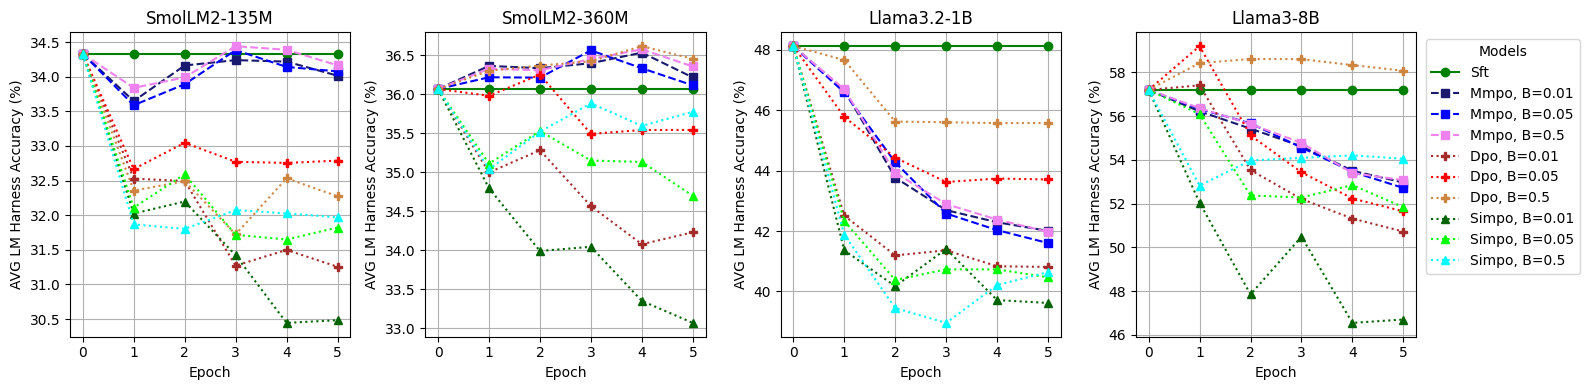

In [157]:
mmpo_dpo_simpo_plot_diagram()

In [149]:
alpaca_eval_root_path = "/home/saeednjf/alpaca_eval/aug11_complete_eval_log"

In [150]:
alpaca_eval_root_path_360m = alpaca_eval_root_path + "/360m"
model_alpacaeval_winrates_360m = {}
model_alpacaeval_lens_360m = {}
for model_id, model_file in model_mappings_360m.items():
    if "_sft_" in model_file: continue
    model_file = model_file.replace("lm_harness_output_", "log_") + ".log"
    model_folder = f"{alpaca_eval_root_path_360m}/{model_file}"
    with open(model_folder, 'r', encoding='utf-8', errors='ignore') as f:
        log_content = f.readlines()
    lines = log_content
    # Define the header we are looking for
    header_keys = "length_controlled_winrate"
    # Find the line index of the header row
    header_index = next(i for i, line in enumerate(lines) if header_keys in line)
    # The data is in the next line
    data_line = lines[header_index + 1]
    # Split the line by whitespace; the values are the last 5 elements
    parts = data_line.split()
    # Extract values using negative indexing for robustness
    length_controlled_winrate = float(parts[-5])
    avg_length = int(parts[-1])
    model_alpacaeval_lens_360m[model_id] = float(avg_length)
    model_alpacaeval_winrates_360m[model_id] = float(length_controlled_winrate)

model_alpacaeval_winrates_360m

{'360m-dpo-epoch_1-length-norm_yes-beta_0.01-entropy_yes': 5.21,
 '360m-dpo-epoch_1-length-norm_yes-beta_0.05-entropy_yes': 4.23,
 '360m-dpo-epoch_1-length-norm_yes-beta_0.1-entropy_yes': 1.79,
 '360m-dpo-epoch_1-length-norm_yes-beta_0.5-entropy_yes': 36.71,
 '360m-dpo-epoch_1-length-norm_yes-beta_0.01-entropy_no': 5.21,
 '360m-dpo-epoch_1-length-norm_yes-beta_0.05-entropy_no': 4.23,
 '360m-dpo-epoch_1-length-norm_yes-beta_0.1-entropy_no': 1.79,
 '360m-dpo-epoch_1-length-norm_yes-beta_0.5-entropy_no': 36.71,
 '360m-dpo-epoch_1-length-norm_no-beta_0.01-entropy_yes': 76.5,
 '360m-dpo-epoch_1-length-norm_no-beta_0.05-entropy_yes': 62.28,
 '360m-dpo-epoch_1-length-norm_no-beta_0.1-entropy_yes': 56.98,
 '360m-dpo-epoch_1-length-norm_no-beta_0.5-entropy_yes': 51.88,
 '360m-dpo-epoch_1-length-norm_no-beta_0.01-entropy_no': 76.5,
 '360m-dpo-epoch_1-length-norm_no-beta_0.05-entropy_no': 62.28,
 '360m-dpo-epoch_1-length-norm_no-beta_0.1-entropy_no': 56.98,
 '360m-dpo-epoch_1-length-norm_no-beta_

In [151]:
alpaca_eval_root_path_135m = alpaca_eval_root_path + "/135m"
model_alpacaeval_winrates_135m = {}
model_alpacaeval_lens_135m = {}
for model_id, model_file in model_mappings_135m.items():
    if "_sft_" in model_file: continue
    model_file = model_file.replace("lm_harness_output_", "log_") + ".log"
    model_folder = f"{alpaca_eval_root_path_135m}/{model_file}"
    with open(model_folder, 'r', encoding='utf-8', errors='ignore') as f:
        log_content = f.readlines()
    lines = log_content
    # Define the header we are looking for
    header_keys = "length_controlled_winrate"
    # Find the line index of the header row
    header_index = next(i for i, line in enumerate(lines) if header_keys in line)
    # The data is in the next line
    data_line = lines[header_index + 1]
    # Split the line by whitespace; the values are the last 5 elements
    parts = data_line.split()
    # Extract values using negative indexing for robustness
    length_controlled_winrate = float(parts[-5])
    avg_length = int(parts[-1])
    model_alpacaeval_lens_135m[model_id] = float(avg_length)
    model_alpacaeval_winrates_135m[model_id] = float(length_controlled_winrate)

model_alpacaeval_winrates_135m

{'135m-dpo-epoch_1-length-norm_yes-beta_0.01-entropy_yes': 0.5,
 '135m-dpo-epoch_1-length-norm_yes-beta_0.05-entropy_yes': 0.5,
 '135m-dpo-epoch_1-length-norm_yes-beta_0.1-entropy_yes': 1.39,
 '135m-dpo-epoch_1-length-norm_yes-beta_0.5-entropy_yes': 5.07,
 '135m-dpo-epoch_1-length-norm_yes-beta_0.01-entropy_no': 0.5,
 '135m-dpo-epoch_1-length-norm_yes-beta_0.05-entropy_no': 0.5,
 '135m-dpo-epoch_1-length-norm_yes-beta_0.1-entropy_no': 1.39,
 '135m-dpo-epoch_1-length-norm_yes-beta_0.5-entropy_no': 5.07,
 '135m-dpo-epoch_1-length-norm_no-beta_0.01-entropy_yes': 7.79,
 '135m-dpo-epoch_1-length-norm_no-beta_0.05-entropy_yes': 9.77,
 '135m-dpo-epoch_1-length-norm_no-beta_0.1-entropy_yes': 10.22,
 '135m-dpo-epoch_1-length-norm_no-beta_0.5-entropy_yes': 10.01,
 '135m-dpo-epoch_1-length-norm_no-beta_0.01-entropy_no': 7.79,
 '135m-dpo-epoch_1-length-norm_no-beta_0.05-entropy_no': 9.77,
 '135m-dpo-epoch_1-length-norm_no-beta_0.1-entropy_no': 10.22,
 '135m-dpo-epoch_1-length-norm_no-beta_0.5-entr

In [152]:
alpaca_eval_root_path_llama31b = alpaca_eval_root_path + "/llama3.2-1b"
model_alpacaeval_winrates_llama31b = {}
model_alpacaeval_lens_llama31b = {}
for model_id, model_file in model_mappings_llama_1b.items():
    if "-sft-" in model_file: continue
    model_file = model_file.replace("lm_harness_output_", "log_") + ".log"
    model_folder = f"{alpaca_eval_root_path_llama31b}/{model_file}"
    with open(model_folder, 'r', encoding='utf-8', errors='ignore') as f:
        log_content = f.readlines()
    lines = log_content
    # Define the header we are looking for
    header_keys = "length_controlled_winrate"
    # Find the line index of the header row
    header_index = next(i for i, line in enumerate(lines) if header_keys in line)
    # The data is in the next line
    data_line = lines[header_index + 1]
    # Split the line by whitespace; the values are the last 5 elements
    parts = data_line.split()
    # Extract values using negative indexing for robustness
    length_controlled_winrate = float(parts[-5])
    avg_length = int(parts[-1])
    model_alpacaeval_lens_llama31b[model_id] = float(avg_length)
    model_alpacaeval_winrates_llama31b[model_id] = float(length_controlled_winrate)

model_alpacaeval_winrates_llama31b

{'llama3.2_1b-dpo-epoch_1-length-norm_yes-beta_0.01-entropy_yes': 1.12,
 'llama3.2_1b-dpo-epoch_1-length-norm_yes-beta_0.05-entropy_yes': 5.16,
 'llama3.2_1b-dpo-epoch_1-length-norm_yes-beta_0.1-entropy_yes': 6.83,
 'llama3.2_1b-dpo-epoch_1-length-norm_yes-beta_0.5-entropy_yes': 3.53,
 'llama3.2_1b-dpo-epoch_1-length-norm_yes-beta_0.01-entropy_no': 1.12,
 'llama3.2_1b-dpo-epoch_1-length-norm_yes-beta_0.05-entropy_no': 5.16,
 'llama3.2_1b-dpo-epoch_1-length-norm_yes-beta_0.1-entropy_no': 6.83,
 'llama3.2_1b-dpo-epoch_1-length-norm_yes-beta_0.5-entropy_no': 3.53,
 'llama3.2_1b-dpo-epoch_1-length-norm_no-beta_0.01-entropy_yes': 47.57,
 'llama3.2_1b-dpo-epoch_1-length-norm_no-beta_0.05-entropy_yes': 50.2,
 'llama3.2_1b-dpo-epoch_1-length-norm_no-beta_0.1-entropy_yes': 49.72,
 'llama3.2_1b-dpo-epoch_1-length-norm_no-beta_0.5-entropy_yes': 49.73,
 'llama3.2_1b-dpo-epoch_1-length-norm_no-beta_0.01-entropy_no': 47.57,
 'llama3.2_1b-dpo-epoch_1-length-norm_no-beta_0.05-entropy_no': 50.2,
 'llam

In [153]:
alpaca_eval_root_path_llama38b = alpaca_eval_root_path + "/llama3-8b"
model_alpacaeval_winrates_llama38b = {}
model_alpacaeval_lens_llama38b = {}
for model_id, model_file in model_mappings_llama_8b.items():
    if "-SFT" in model_file: continue
    model_file = model_file.replace("lm_harness_output_", "log_") + ".log"
    model_folder = f"{alpaca_eval_root_path_llama38b}/{model_file}"
    with open(model_folder, 'r', encoding='utf-8', errors='ignore') as f:
        log_content = f.readlines()
    lines = log_content
    # Define the header we are looking for
    header_keys = "length_controlled_winrate"
    # Find the line index of the header row
    header_index = next(i for i, line in enumerate(lines) if header_keys in line)
    # The data is in the next line
    data_line = lines[header_index + 1]
    # Split the line by whitespace; the values are the last 5 elements
    parts = data_line.split()
    # Extract values using negative indexing for robustness
    length_controlled_winrate = float(parts[-5])
    avg_length = int(parts[-1])
    model_alpacaeval_lens_llama38b[model_id] = float(avg_length)
    model_alpacaeval_winrates_llama38b[model_id] = float(length_controlled_winrate)

model_alpacaeval_winrates_llama38b

{'llama3_8b-dpo-epoch_1-length-norm_no-beta_0.01-entropy_no': 65.92,
 'llama3_8b-dpo-epoch_1-length-norm_no-beta_0.05-entropy_no': 62.54,
 'llama3_8b-dpo-epoch_1-length-norm_no-beta_0.5-entropy_no': 55.62,
 'llama3_8b-simpo-epoch_1-length-norm_no-beta_0.01-entropy_no': 41.9,
 'llama3_8b-simpo-epoch_1-length-norm_no-beta_0.05-entropy_no': 55.38,
 'llama3_8b-simpo-epoch_1-length-norm_no-beta_0.5-entropy_no': 49.93,
 'llama3_8b-mmpo-epoch_1-length-norm_no-beta_0.01-entropy_no': 60.01,
 'llama3_8b-mmpo-epoch_1-length-norm_no-beta_0.05-entropy_no': 59.19,
 'llama3_8b-mmpo-epoch_1-length-norm_no-beta_0.5-entropy_no': 59.07,
 'llama3_8b-dpo-epoch_2-length-norm_no-beta_0.01-entropy_no': 63.81,
 'llama3_8b-dpo-epoch_2-length-norm_no-beta_0.05-entropy_no': 63.12,
 'llama3_8b-dpo-epoch_2-length-norm_no-beta_0.5-entropy_no': 55.06,
 'llama3_8b-simpo-epoch_2-length-norm_no-beta_0.01-entropy_no': 26.63,
 'llama3_8b-simpo-epoch_2-length-norm_no-beta_0.05-entropy_no': 54.83,
 'llama3_8b-simpo-epoch_2-

In [170]:
def model_vars(model_str):
    if "dpo" in model_str:
        return ("dpo", "no", "no")
    elif "dpo-len" in model_str:
        return ("dpo", "yes", "no")
    elif "simpo" in model_str:
        return ("simpo", "no", "no")
    elif "simpo-len" in model_str:
        return ("simpo", "yes", "no")
    elif "mmpo" in model_str:
        return ("mmpo", "no", "no")
    elif "mmpo-len" in model_str:
        return ("mmpo", "yes", "no")
    elif "mmpo-ent" in model_str:
        return ("mmpo", "no", "yes")
    elif "mmpo-len-ent" in model_str:
        return ("mmpo", "yes", "yes")
    elif "sft" in model_str:
        return ("sft", None, None)

line_styles = {"dpo": 'dotted',
               "mmpo": 'dashed',
               "simpo": "dotted",
               "sft": "solid"}

colors = {
"mmpo=0.01": "midnightblue",
"mmpo=0.05": "blue",
"mmpo=0.1": "mediumpurple",
"mmpo=0.5": "violet",
"dpo=0.01": "brown",
"dpo=0.05": "red",
"dpo=0.1": "lightsalmon",
"dpo=0.5": "peru",
"simpo=0.01": "darkgreen",
"simpo=0.05": "lime",
"simpo=0.1": "lightseagreen",
"simpo=0.5": "cyan",
"sft": "green"
}

def mmpo_dpo_bubble_plot_diagram():
    # Model names and markers
    models = {
        # "sft": "o",           # Hexagon
        "mmpo=0.01": "s",          # Cross (filled)
        "mmpo=0.05": "s",
        # "mmpo=0.1": "s",
        "mmpo=0.5": "s",
        "dpo=0.01": ".",         # Circle
        "dpo=0.05": ".",         # Circle
        # "dpo=0.1": "P",          # Circle
        "dpo=0.5": ".",          # Circle
        # "dpo-len": "s",       # Square
        # "simpo=0.01": "^",         # Triangle Up
        # "simpo=0.05": "^",         # Triangle Up
        # "simpo=0.1": "^",         # Triangle Up
        # "simpo=0.5": "^",         # Triangle Up
        # "simpo-len": "P",     # Plus (filled)
        # "mmpo-len": "D",      # Diamond
        # "mmpo-ent": "*",      # Star
        # "mmpo-len-ent": "p",  # Pentagon

    }
    
    fig, axs = plt.subplots(1, 4, figsize=(20, 6))  # 2 rows, 1 column    
    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 135-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"135m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_135m:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_135m[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_135m[key])

        axs[0].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])

        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[0].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )
    
    # Styling the plot
    axs[0].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[0].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[0].set_title('SmolLM2-135M')
    # axs[0].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    axs[0].grid(True)
    

    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 360-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"360m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_360m:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_360m[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_360m[key])

        axs[1].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])
        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[1].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )

    # Styling the plot
    axs[1].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[1].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[1].set_title('SmolLM2-360M')
    # axs[1].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    axs[1].grid(True)


    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3.2_1b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_llama_1b:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_llama_1b[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_llama31b[key])

        axs[2].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])

        
        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[2].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )
    
    
    # Styling the plot
    axs[2].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[2].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[2].set_title('Llama3.2-1B')
    # axs[2].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    axs[2].grid(True)

    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3_8b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_llama_8b:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_llama_8b[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_llama38b[key])
    
        axs[3].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])

        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[3].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )

    # Styling the plot
    axs[3].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[3].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[3].set_title('Llama3-8B')
    # axs[3].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    axs[3].grid(True)

    
    plt.legend(title='Models', bbox_to_anchor=(1.01, 1))
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"mmpo-dpo-bubble-results.png", dpi=300)
    plt.show()

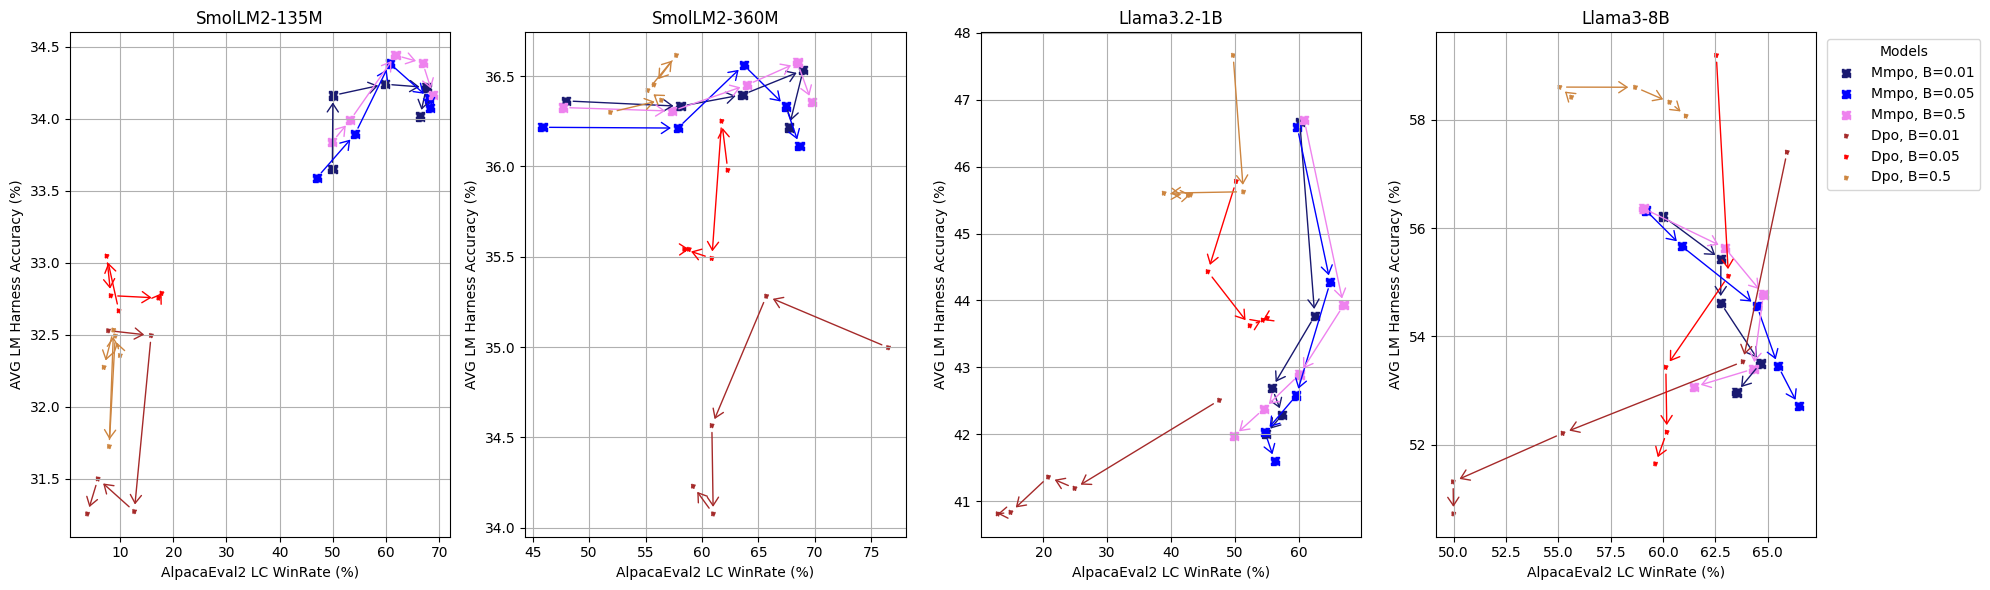

In [171]:
mmpo_dpo_bubble_plot_diagram()

In [130]:
def model_vars(model_str):
    if "dpo" in model_str:
        return ("dpo", "no", "no")
    elif "dpo-len" in model_str:
        return ("dpo", "yes", "no")
    elif "simpo" in model_str:
        return ("simpo", "no", "no")
    elif "simpo-len" in model_str:
        return ("simpo", "yes", "no")
    elif "mmpo" in model_str:
        return ("mmpo", "no", "no")
    elif "mmpo-len" in model_str:
        return ("mmpo", "yes", "no")
    elif "mmpo-ent" in model_str:
        return ("mmpo", "no", "yes")
    elif "mmpo-len-ent" in model_str:
        return ("mmpo", "yes", "yes")
    elif "sft" in model_str:
        return ("sft", None, None)

line_styles = {"dpo": 'dotted',
               "mmpo": 'dashed',
               "simpo": "dotted",
               "sft": "solid"}

colors = {
"mmpo=0.01": "midnightblue",
"mmpo=0.05": "blue",
"mmpo=0.1": "mediumpurple",
"mmpo=0.5": "violet",
"dpo=0.01": "brown",
"dpo=0.05": "red",
"dpo=0.1": "lightsalmon",
"dpo=0.5": "peru",
"simpo=0.01": "darkgreen",
"simpo=0.05": "lime",
"simpo=0.1": "lightseagreen",
"simpo=0.5": "cyan",
"sft": "green"
}

def mmpo_simpo_bubble_plot_diagram():
    # Model names and markers
    models = {
        # "sft": "o",           # Hexagon
        "mmpo=0.01": "s",          # Cross (filled)
        "mmpo=0.05": "s",
        # "mmpo=0.1": "s",
        "mmpo=0.5": "s",
        # "dpo=0.01": ".",         # Circle
        # "dpo=0.05": ".",         # Circle
        # "dpo=0.1": "P",          # Circle
        # "dpo=0.5": ".",          # Circle
        # "dpo-len": "s",       # Square
        "simpo=0.01": "^",         # Triangle Up
        "simpo=0.05": "^",         # Triangle Up
        # "simpo=0.1": "^",         # Triangle Up
        "simpo=0.5": "^",         # Triangle Up
        # "simpo-len": "P",     # Plus (filled)
        # "mmpo-len": "D",      # Diamond
        # "mmpo-ent": "*",      # Star
        # "mmpo-len-ent": "p",  # Pentagon

    }
    
    fig, axs = plt.subplots(1, 4, figsize=(20, 6))  # 2 rows, 1 column    
    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 135-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"135m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_135m:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_135m[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_135m[key])

        axs[0].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])

        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[0].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )
    
    # Styling the plot
    axs[0].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[0].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[0].set_title('SmolLM2-135M')
    # axs[0].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    axs[0].grid(True)
    

    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 360-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"360m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_360m:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_360m[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_360m[key])

        axs[1].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])
        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[1].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )

    # Styling the plot
    axs[1].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[1].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[1].set_title('SmolLM2-360M')
    # axs[1].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    axs[1].grid(True)


    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3.2_1b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_llama_1b:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_llama_1b[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_llama31b[key])

        axs[2].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])

        
        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[2].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.4", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )
    
    
    # Styling the plot
    axs[2].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[2].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[2].set_title('Llama3.2-1B')
    # axs[2].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    axs[2].grid(True)

    for model, marker in models.items():
        lm_harness_accuracies = []
        alpaca_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3_8b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_lm_harness_avg_scores_llama_8b:
                    lm_harness_accuracies.append(model_lm_harness_avg_scores_llama_8b[key])
                    alpaca_winrates.append(model_alpacaeval_winrates_llama38b[key])
    
        axs[3].scatter(alpaca_winrates, lm_harness_accuracies, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])

        for i in range(len(alpaca_winrates) - 1):
            start_point = (alpaca_winrates[i], lm_harness_accuracies[i])
            end_point = (alpaca_winrates[i+1], lm_harness_accuracies[i+1])
                
            axs[3].annotate(
                '',  # No text
                xy=end_point,
                xytext=start_point,
                arrowprops=dict(
                        arrowstyle="->,head_length=0.6,head_width=0.2", # Smaller arrow heads
                        color=colors[model],
                        linewidth=1.0, # Thinner line
                        shrinkA=5, 
                        shrinkB=5
                ),
                xycoords='data'
            )

    # Styling the plot
    axs[3].set_xlabel(f'AlpacaEval2 LC WinRate (%)')
    axs[3].set_ylabel(f'AVG LM Harness Accuracy (%)')
    axs[3].set_title('Llama3-8B')
    # axs[3].set_xticks(alpaca_winrates)  # Ensure we have ticks for all epochs including 0
    axs[3].grid(True)

    
    plt.legend(title='Models', bbox_to_anchor=(1.01, 1))
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"mmpo-simpo-bubble-results.png", dpi=300)
    plt.show()

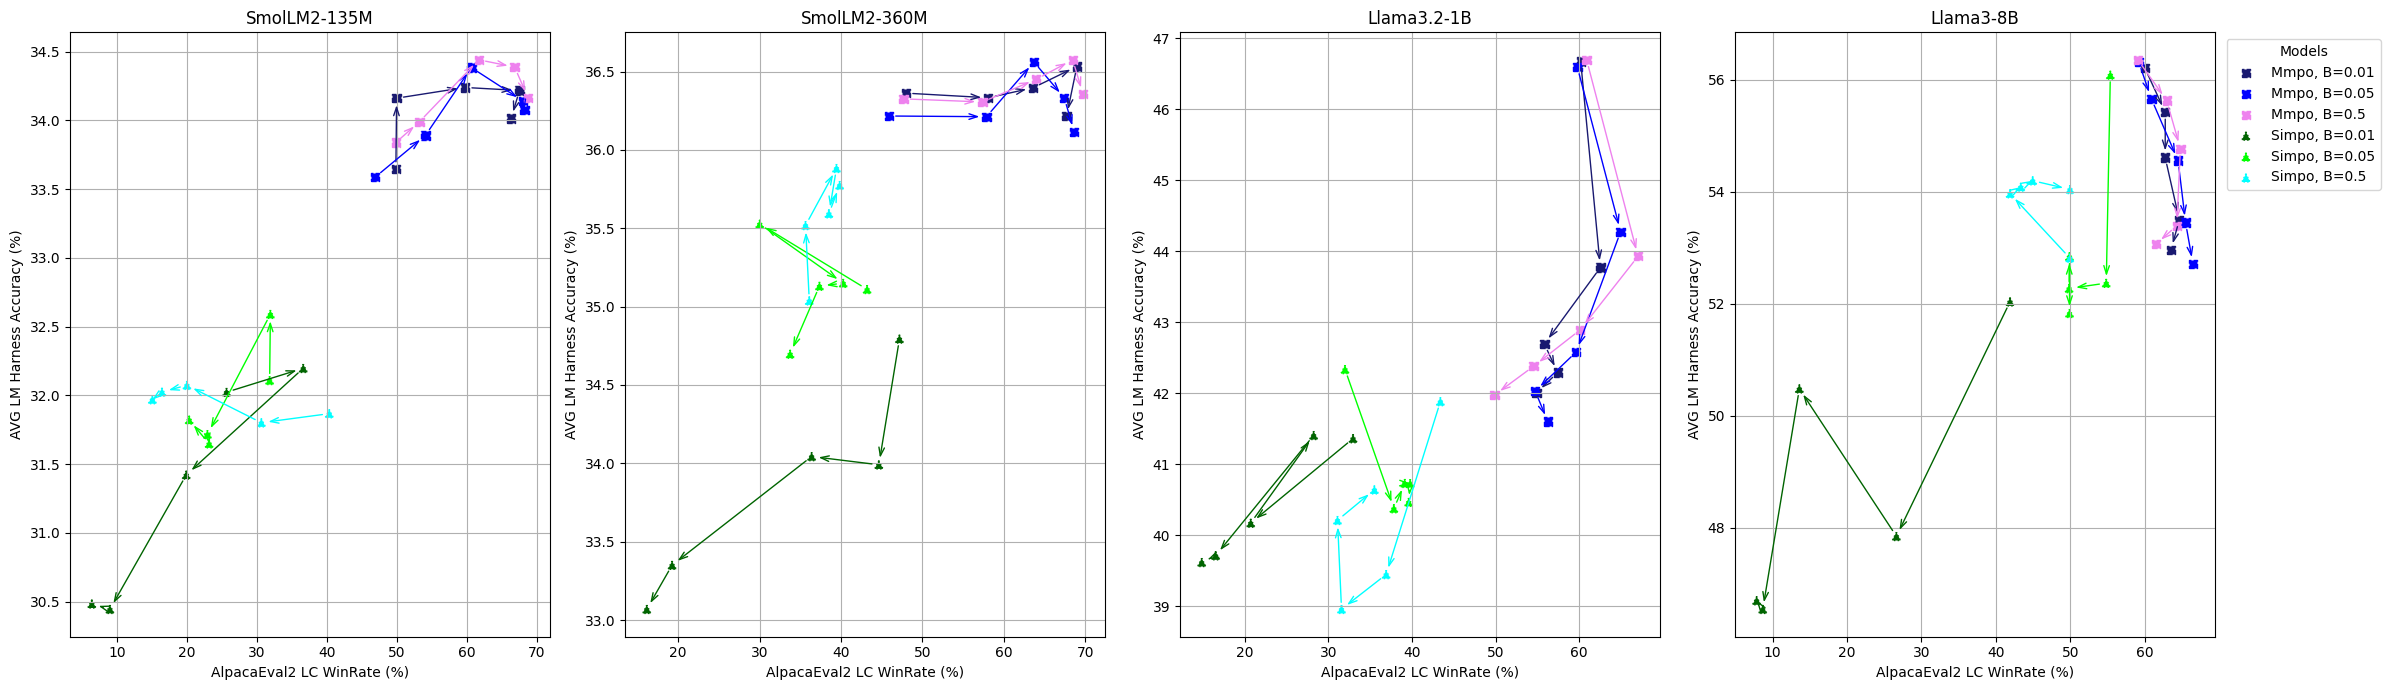

In [131]:
mmpo_simpo_bubble_plot_diagram()

In [154]:
def model_vars(model_str):
    if "dpo" in model_str:
        return ("dpo", "no", "no")
    elif "dpo-len" in model_str:
        return ("dpo", "yes", "no")
    elif "simpo" in model_str:
        return ("simpo", "no", "no")
    elif "simpo-len" in model_str:
        return ("simpo", "yes", "no")
    elif "mmpo" in model_str:
        return ("mmpo", "no", "no")
    elif "mmpo-len" in model_str:
        return ("mmpo", "yes", "no")
    elif "mmpo-ent" in model_str:
        return ("mmpo", "no", "yes")
    elif "mmpo-len-ent" in model_str:
        return ("mmpo", "yes", "yes")
    elif "sft" in model_str:
        return ("sft", None, None)

line_styles = {"dpo": 'dotted',
               "mmpo": 'dashed',
               "simpo": "dotted",
               "sft": "solid"}

colors = {
"mmpo=0.01": "midnightblue",
"mmpo=0.05": "blue",
"mmpo=0.1": "mediumpurple",
"mmpo=0.5": "violet",
"dpo=0.01": "brown",
"dpo=0.05": "red",
"dpo=0.1": "lightsalmon",
"dpo=0.5": "peru",
"simpo=0.01": "darkgreen",
"simpo=0.05": "lime",
"simpo=0.1": "lightseagreen",
"simpo=0.5": "cyan",
"sft": "green"
}

def alpaca_mmpo_simpo_dpo_plot_diagram():
    # Model names and markers
    models = {
        "mmpo=0.01": "s",          # Cross (filled)
        "mmpo=0.05": "s",
        # "mmpo=0.1": "s",
        "mmpo=0.5": "s",
        "dpo=0.01": "P",         # Circle
        "dpo=0.05": "P",         # Circle
        # "dpo=0.1": "P",          # Circle
        "dpo=0.5": "P",          # Circle
        # "dpo-len": "s",       # Square
        "simpo=0.01": "^",         # Triangle Up
        "simpo=0.05": "^",         # Triangle Up
        # "simpo=0.1": "^",         # Triangle Up
        "simpo=0.5": "^",         # Triangle Up
        # "simpo-len": "P",     # Plus (filled)
        # "mmpo-len": "D",      # Diamond
        # "mmpo-ent": "*",      # Star
        # "mmpo-len-ent": "p",  # Pentagon

    }
    
    fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 2 rows, 1 column
    
    # Add the '135-sft' model as a starting point for all models
    epochs = list(range(1, 6))  # Epochs from 0 to 5
    
    for model, marker in models.items():
        lc_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 135-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"135m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_alpacaeval_winrates_135m:
                    lc_winrates.append(model_alpacaeval_winrates_135m[key])
                else:
                    lc_winrates.append(None)  # In case some data is missing, leaving gaps

        axs[0].plot(epochs, lc_winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel(f'AlpacaEval2 LC WinRate (%)')
    axs[0].set_title('SmolLM2-135M')
    axs[0].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[0].grid(True)
    
    
    # Add the '360-sft' model as a starting point for all models
    epochs = list(range(1, 6))  # Epochs from 0 to 5

    for model, marker in models.items():
        lc_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 360-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"360m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_alpacaeval_winrates_360m:
                    lc_winrates.append(model_alpacaeval_winrates_360m[key])
                else:
                    lc_winrates.append(None)  # In case some data is missing, leaving gaps
    
        axs[1].plot(epochs, lc_winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel(f'AlpacaEval2 LC WinRate (%)')
    axs[1].set_title('SmolLM2-360M')
    axs[1].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[1].grid(True)


    # Add the 'llama3.2_1b-sft' model as a starting point for all models
    epochs = list(range(1, 6))  # Epochs from 0 to 5
    
    for model, marker in models.items():
        lc_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3.2_1b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_alpacaeval_winrates_llama31b:
                    lc_winrates.append(model_alpacaeval_winrates_llama31b[key])
                else:
                    lc_winrates.append(None)  # In case some data is missing, leaving gaps

        axs[2].plot(epochs, lc_winrates, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel(f'AlpacaEval2 LC WinRate (%)')
    axs[2].set_title('Llama3.2-1B')
    axs[2].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[2].grid(True)

    # Add the 'llama3.2_1b-sft' model as a starting point for all models
    epochs = list(range(1, 6))  # Epochs from 0 to 5
    
    for model, marker in models.items():
        lc_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3_8b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_alpacaeval_winrates_llama38b:
                    lc_winrates.append(model_alpacaeval_winrates_llama38b[key])
                else:
                    lc_winrates.append(None)  # In case some data is missing, leaving gaps

        axs[3].plot(epochs, lc_winrates, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[3].set_xlabel('Epoch')
    axs[3].set_ylabel(f'AlpacaEval2 LC WinRate (%)')
    axs[3].set_title('Llama3-8B')
    axs[3].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[3].grid(True)
    
    
    plt.legend(title='Models', bbox_to_anchor=(1.01, 1))
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"mmpo-simpo-dpo-alpacaeval2-results.png", dpi=300)
    plt.show()

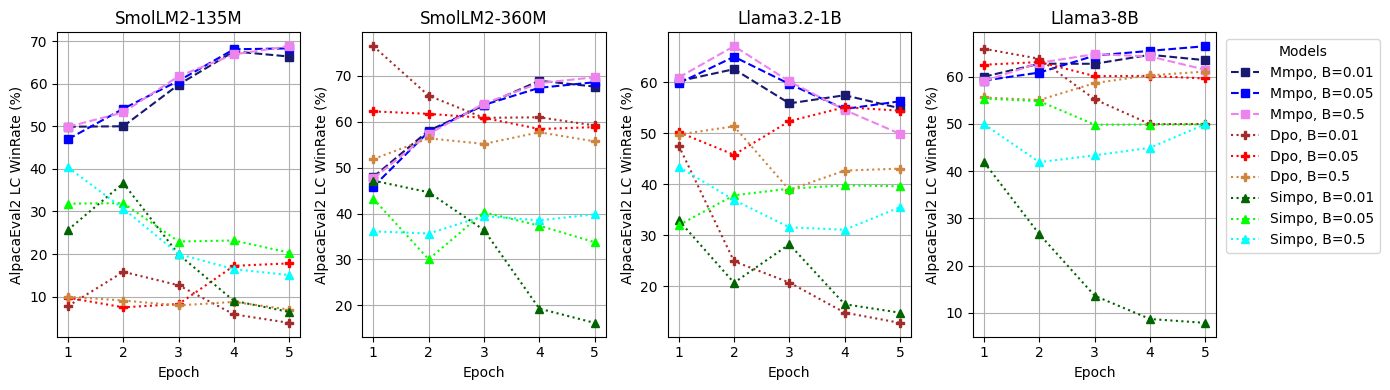

In [155]:
alpaca_mmpo_simpo_dpo_plot_diagram()

In [40]:
def model_vars(model_str):
    if "dpo" in model_str:
        return ("dpo", "no", "no")
    elif "dpo-len" in model_str:
        return ("dpo", "yes", "no")
    elif "simpo" in model_str:
        return ("simpo", "no", "no")
    elif "simpo-len" in model_str:
        return ("simpo", "yes", "no")
    elif "mmpo" in model_str:
        return ("mmpo", "no", "no")
    elif "mmpo-len" in model_str:
        return ("mmpo", "yes", "no")
    elif "mmpo-ent" in model_str:
        return ("mmpo", "no", "yes")
    elif "mmpo-len-ent" in model_str:
        return ("mmpo", "yes", "yes")
    elif "sft" in model_str:
        return ("sft", None, None)

line_styles = {"dpo": 'dotted',
               "mmpo": 'dashed',
               "simpo": "dotted",
               "sft": "solid"}

colors = {
"mmpo=0.01": "midnightblue",
"mmpo=0.05": "blue",
"mmpo=0.1": "mediumpurple",
"mmpo=0.5": "violet",
"dpo=0.01": "brown",
"dpo=0.05": "red",
"dpo=0.1": "lightsalmon",
"dpo=0.5": "peru",
"simpo=0.01": "darkgreen",
"simpo=0.05": "lime",
"simpo=0.1": "lightseagreen",
"simpo=0.5": "cyan",
"sft": "green"
}

def alpaca_mmpo_simpo_plot_diagram():
    # Model names and markers
    models = {
        "mmpo=0.01": "s",          # Cross (filled)
        "mmpo=0.05": "s",
        "mmpo=0.1": "s",
        "mmpo=0.5": "s",
        # "dpo=0.01": "P",         # Circle
        # "dpo=0.05": "P",         # Circle
        # "dpo=0.1": "P",          # Circle
        # "dpo=0.5": "P",          # Circle
        # "dpo-len": "s",       # Square
        "simpo=0.01": "*",         # Triangle Up
        "simpo=0.05": "*",         # Triangle Up
        "simpo=0.1": "*",         # Triangle Up
        "simpo=0.5": "*",         # Triangle Up
        # "simpo-len": "P",     # Plus (filled)
        # "mmpo-len": "D",      # Diamond
        # "mmpo-ent": "*",      # Star
        # "mmpo-len-ent": "p",  # Pentagon

    }
    
    fig, axs = plt.subplots(1, 3, figsize=(14, 4))  # 2 rows, 1 column
    
    # Add the '135-sft' model as a starting point for all models
    epochs = list(range(1, 6))  # Epochs from 0 to 5
    
    for model, marker in models.items():
        lc_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 135-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"135m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_alpacaeval_winrates_135m:
                    lc_winrates.append(model_alpacaeval_winrates_135m[key])
                else:
                    lc_winrates.append(None)  # In case some data is missing, leaving gaps

        axs[0].plot(epochs, lc_winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel(f'AlpacaEval2 LC WinRate (%)')
    axs[0].set_title('SmolLM2-135M')
    axs[0].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[0].grid(True)
    
    
    # Add the '360-sft' model as a starting point for all models
    epochs = list(range(1, 6))  # Epochs from 0 to 5

    for model, marker in models.items():
        lc_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":  # Skip 360-sft as it does not have epochs
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"360m-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_alpacaeval_winrates_360m:
                    lc_winrates.append(model_alpacaeval_winrates_360m[key])
                else:
                    lc_winrates.append(None)  # In case some data is missing, leaving gaps
    
        axs[1].plot(epochs, lc_winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel(f'AlpacaEval2 LC WinRate (%)')
    axs[1].set_title('SmolLM2-360M')
    axs[1].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[1].grid(True)


    # Add the 'llama3.2_1b-sft' model as a starting point for all models
    epochs = list(range(1, 6))  # Epochs from 0 to 5
    
    for model, marker in models.items():
        lc_winrates = []
        obj_type, len_norm, entp = model_vars(model)
        if model != "sft":
            for epoch in range(1, 6):  # Epochs 1 to 5
                beta = model.split("=")[1]
                key = f"llama3.2_1b-{obj_type}-epoch_{epoch}-length-norm_{len_norm}-beta_{beta}-entropy_{entp}"
                if key in model_alpacaeval_winrates_llama31b:
                    lc_winrates.append(model_alpacaeval_winrates_llama31b[key])
                else:
                    lc_winrates.append(None)  # In case some data is missing, leaving gaps

        axs[2].plot(epochs, lc_winrates, marker=marker, label=model.replace('=', ', β=').title(), linestyle=line_styles[obj_type],
            color=colors[model])
    
    # Styling the plot
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel(f'AlpacaEval2 LC WinRate (%)')
    axs[2].set_title('Llama3.2-1B')
    axs[2].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
    axs[2].grid(True)
    
    
    plt.legend(title='Models', bbox_to_anchor=(1.01, 1))
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"mmpo-simpo-alpacaeval2-results.png", dpi=300)
    plt.show()

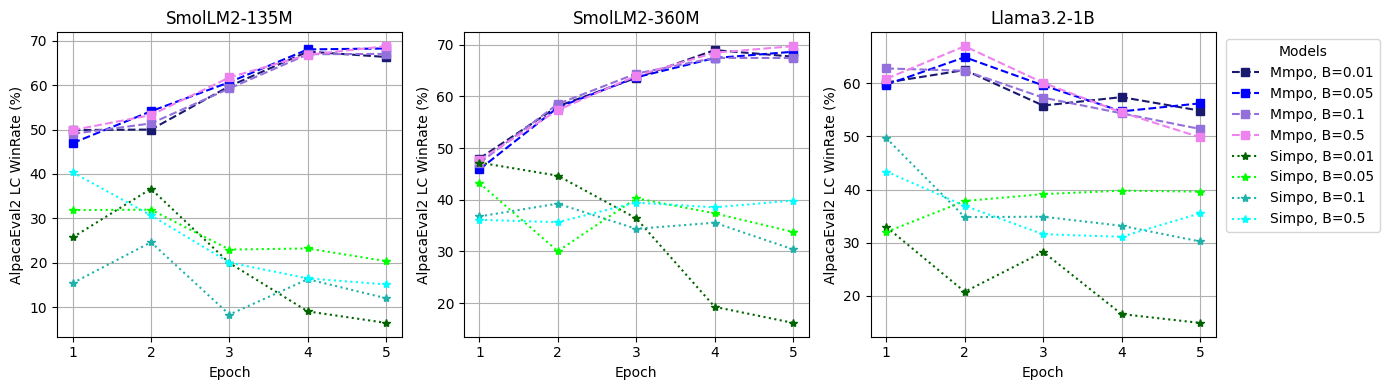

In [41]:
alpaca_mmpo_simpo_plot_diagram()

In [34]:
mt_winrate_135m_string = """smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1148                                 75    34   51  0.468750   0.212500           0.628125
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-575                                  61    28   71  0.381250   0.175000           0.603125
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1723                                 62    34   64  0.387500   0.212500           0.587500
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-2298                                 63    46   51  0.393750   0.287500           0.553125
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1150             58    42   60  0.362500   0.262500           0.550000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2870      50    35   75  0.312500   0.218750           0.546875
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1725             57    42   61  0.356250   0.262500           0.546875
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2300      52    39   69  0.325000   0.243750           0.540625
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2870   52    39   69  0.325000   0.243750           0.540625
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2870    47    42   71  0.293750   0.262500           0.515625
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-2870                                 54    49   57  0.337500   0.306250           0.515625
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2300             53    50   56  0.333333   0.314465           0.509434
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2300   50    48   62  0.312500   0.300000           0.506250
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2300    45    44   71  0.281250   0.275000           0.503125
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1725   45    48   67  0.281250   0.300000           0.490625
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1725      37    41   81  0.232704   0.257862           0.487421
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2870     45    51   64  0.281250   0.318750           0.481250
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-575              42    52   66  0.262500   0.325000           0.468750
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1725    40    54   66  0.250000   0.337500           0.456250
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2870             47    62   51  0.293750   0.387500           0.453125
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1150   39    59   61  0.245283   0.371069           0.437107
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1725     30    53   77  0.187500   0.331250           0.428125
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2300     31    59   70  0.193750   0.368750           0.412500
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1150    32    60   67  0.201258   0.377358           0.411950
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1150      30    59   70  0.188679   0.371069           0.408805
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-575    31    63   66  0.193750   0.393750           0.400000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1150     26    64   70  0.162500   0.400000           0.381250
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-575       32    72   56  0.200000   0.450000           0.375000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-575     21    64   75  0.131250   0.400000           0.365625
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-575      20    86   54  0.125000   0.537500           0.293750
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-575             16    96   48  0.100000   0.600000           0.250000
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-575                                 11   118   31  0.068750   0.737500           0.165625
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-1725             3   114   42  0.018868   0.716981           0.150943
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-1150             4   120   36  0.025000   0.750000           0.137500
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-2300             4   128   27  0.025157   0.805031           0.110063
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-2870             3   128   29  0.018750   0.800000           0.109375
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-2870                                 2   129   29  0.012500   0.806250           0.103125
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-1150                                 3   136   21  0.018750   0.850000           0.084375
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-1725                                 1   135   24  0.006250   0.843750           0.081250
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-2300                                 1   137   22  0.006250   0.856250           0.075000"""

mt_winrate_135m = {}
for line in mt_winrate_135m_string.split("\n"):
    line_arr = line.split()
    model_id = line_arr[0]
    model_adjusted_win_rate = line_arr[-1]
    mt_winrate_135m[model_id] = 100.0 * float(model_adjusted_win_rate)

mt_winrate_135m

{'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1148': 62.81250000000001,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-575': 60.3125,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1723': 58.75,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-2298': 55.3125,
 'smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1150': 55.00000000000001,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2870': 54.6875,
 'smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1725': 54.6875,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2300': 54.0625,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0

In [35]:
mt_winrate_360m_string = """smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2298                                77    19   64  0.481250   0.118750           0.681250
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1723                                77    20   63  0.481250   0.125000           0.678125
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2870                                79    23   58  0.493750   0.143750           0.675000
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1148                                78    23   59  0.487500   0.143750           0.671875
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-575                                 71    18   71  0.443750   0.112500           0.665625
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1148             71    29   60  0.443750   0.181250           0.631250
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1723             61    39   60  0.381250   0.243750           0.568750
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2870     56    36   68  0.350000   0.225000           0.562500
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2298             61    42   57  0.381250   0.262500           0.559375
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-575              58    39   63  0.362500   0.243750           0.559375
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2870   61    42   57  0.381250   0.262500           0.559375
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1725   57    41   62  0.356250   0.256250           0.550000
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1148      52    37   71  0.325000   0.231250           0.546875
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2296     48    36   76  0.300000   0.225000           0.537500
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2298      55    45   60  0.343750   0.281250           0.531250
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2870             58    49   53  0.362500   0.306250           0.528125
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2870    51    42   67  0.318750   0.262500           0.528125
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2300   53    44   63  0.331250   0.275000           0.528125
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1725     53    45   62  0.331250   0.281250           0.525000
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2870      49    42   69  0.306250   0.262500           0.521875
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2300    56    51   53  0.350000   0.318750           0.515625
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1725    43    44   73  0.268750   0.275000           0.496875
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1723      47    50   63  0.293750   0.312500           0.490625
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1150     41    53   66  0.256250   0.331250           0.462500
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1150   42    60   58  0.262500   0.375000           0.443750
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1150    35    57   68  0.218750   0.356250           0.431250
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-575       35    61   64  0.218750   0.381250           0.418750
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-575    32    64   64  0.200000   0.400000           0.400000
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-575      27    67   66  0.168750   0.418750           0.375000
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-575     27    67   66  0.168750   0.418750           0.375000
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-575                                28    73   59  0.175000   0.456250           0.359375
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-1150                               26    86   48  0.162500   0.537500           0.312500
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-1725                               15   104   41  0.093750   0.650000           0.221875
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-2870                               14   112   34  0.087500   0.700000           0.193750
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-2300                               10   114   36  0.062500   0.712500           0.175000
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-575             12   121   25  0.075949   0.765823           0.155063
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-1150            11   121   26  0.069620   0.765823           0.151899
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-1725             2   134   23  0.012579   0.842767           0.084906
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-2296             4   137   18  0.025157   0.861635           0.081761
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-2870             4   137   18  0.025157   0.861635           0.081761"""

mt_winrate_360m = {}
for line in mt_winrate_360m_string.split("\n"):
    line_arr = line.split()
    model_id = line_arr[0]
    model_adjusted_win_rate = line_arr[-1]
    mt_winrate_360m[model_id] = 100.0 * float(model_adjusted_win_rate)

mt_winrate_360m

{'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2298': 68.125,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1723': 67.8125,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2870': 67.5,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1148': 67.1875,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-575': 66.5625,
 'smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1148': 63.125,
 'smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1723': 56.875,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2870': 56.25,
 'smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v

In [36]:
mt_winrate_llama1b_string = """llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-1784    56    36   68  0.350000   0.225000           0.562500
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-2225      56    40   64  0.350000   0.250000           0.550000
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-446              66    52   42  0.412500   0.325000           0.543750
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-1784      48    34   78  0.300000   0.212500           0.543750
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-2225   45    32   83  0.281250   0.200000           0.540625
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-892     43    35   82  0.268750   0.218750           0.525000
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-2225    46    39   75  0.287500   0.243750           0.521875
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-1338    45    40   75  0.281250   0.250000           0.515625
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-1784     48    44   68  0.300000   0.275000           0.512500
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-1338      46    42   72  0.287500   0.262500           0.512500
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-2225     51    48   61  0.318750   0.300000           0.509375
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-1338     45    43   72  0.281250   0.268750           0.506250
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-446       39    39   82  0.243750   0.243750           0.500000
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-446     40    43   77  0.250000   0.268750           0.490625
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-1784   42    47   71  0.262500   0.293750           0.484375
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-446                                  56    61   43  0.350000   0.381250           0.484375
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-1338   37    43   80  0.231250   0.268750           0.481250
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-892       41    48   71  0.256250   0.300000           0.478125
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-892      36    44   80  0.225000   0.275000           0.475000
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-446      29    44   87  0.181250   0.275000           0.453125
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-892    31    46   83  0.193750   0.287500           0.453125
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-892              45    62   53  0.281250   0.387500           0.446875
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-446    28    50   82  0.175000   0.312500           0.431250
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-1338                                 47    75   38  0.293750   0.468750           0.412500
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-1338             33    92   35  0.206250   0.575000           0.315625
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-1784                                 30    95   35  0.187500   0.593750           0.296875
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-892                                  33    98   28  0.207547   0.616352           0.295597
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-2225                                 26   104   30  0.162500   0.650000           0.256250
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-1784             22   115   23  0.137500   0.718750           0.209375
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-2225             16   126   18  0.100000   0.787500           0.156250
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-892              3   128   29  0.018750   0.800000           0.109375
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-446                                  6   134   20  0.037500   0.837500           0.100000
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-1338             2   134   24  0.012500   0.837500           0.087500
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-2225             2   136   22  0.012500   0.850000           0.081250
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-1338                                 3   139   18  0.018750   0.868750           0.075000
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-446              3   139   18  0.018750   0.868750           0.075000
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-892                                  3   140   17  0.018750   0.875000           0.071875
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-1784             2   142   16  0.012500   0.887500           0.062500
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-2225                                 0   142   18  0.000000   0.887500           0.056250
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-1784                                 2   146   12  0.012500   0.912500           0.050000"""

mt_winrate_llama1b = {}
for line in mt_winrate_llama1b_string.split("\n"):
    line_arr = line.split()
    model_id = line_arr[0]
    model_adjusted_win_rate = line_arr[-1]
    mt_winrate_llama1b[model_id] = 100.0 * float(model_adjusted_win_rate)

mt_winrate_llama1b

{'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-1784': 56.25,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-2225': 55.00000000000001,
 'llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-446': 54.37499999999999,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-1784': 54.37499999999999,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-2225': 54.0625,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-892': 52.5,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-2225': 52.1875,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-1338': 51.5625,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.000

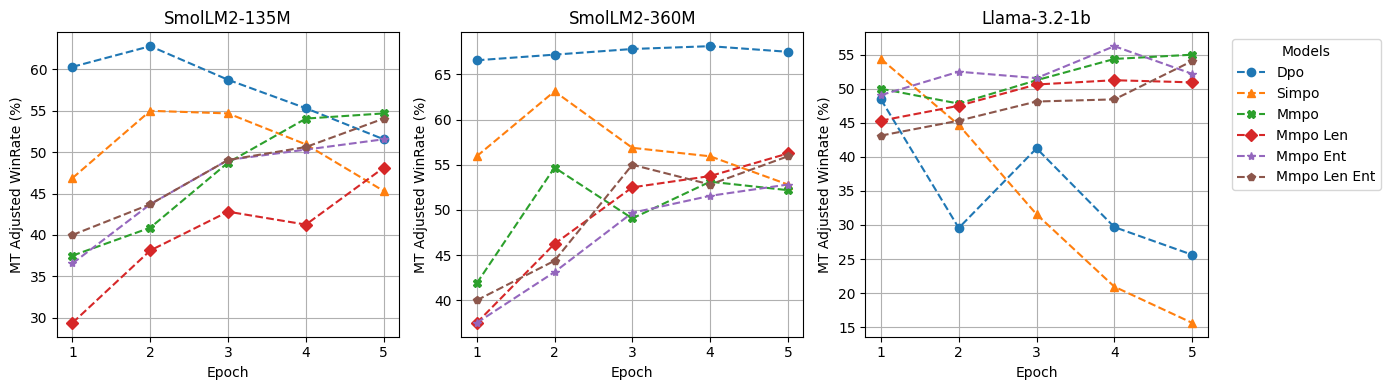

In [37]:
# Model names and markers
models = {
    "dpo": "o",           # Circle
    #"dpo-len": "s",      # Square
    "simpo": "^",         # Triangle Up
    # "simpo-len": "P",   # Plus (filled)
    "mmpo": "X",          # Cross (filled)
    "mmpo-len": "D",      # Diamond
    "mmpo-ent": "*",      # Star
    "mmpo-len-ent": "p",  # Pentagon
    # "sft": "h"          # Hexagon
}

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    winrates = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'135-{model}-epoch-{epoch}'
        if key in model_mappings_135m:
            model_id = model_mappings_135m[key].removeprefix("lm_harness_output_")
            winrates.append(mt_winrate_135m[model_id])
        else:
            winrates.append(None)  # In case some data is missing, leaving gaps

    axs[0].plot(epochs, winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MT Adjusted WinRate (%)')
axs[0].set_title('SmolLM2-135M')
axs[0].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[0].grid(True)


epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    winrates = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'360-{model}-epoch-{epoch}'
        if key in model_mappings_360m:
            model_id = model_mappings_360m[key].removeprefix("lm_harness_output_")
            winrates.append(mt_winrate_360m[model_id])
        else:
            winrates.append(None)  # In case some data is missing, leaving gaps

    axs[1].plot(epochs, winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MT Adjusted WinRate (%)')
axs[1].set_title('SmolLM2-360M')
axs[1].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[1].grid(True)


epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    winrates = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'llama_1b-{model}-epoch-{epoch}'
        if key in model_mappings_llama_1b:
            model_id = model_mappings_llama_1b[key].removeprefix("lm_harness_output_")
            winrates.append(mt_winrate_llama1b[model_id])
        else:
            winrates.append(None)  # In case some data is missing, leaving gaps

    axs[2].plot(epochs, winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('MT Adjusted WinRate (%)')
axs[2].set_title('Llama-3.2-1b')
axs[2].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[2].grid(True)


plt.legend(title='Models', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("sft-360-135-llama1b-mt-win-rates-results.png", dpi=300)
plt.show()

In [38]:
arena_hard_winrate_135m_string = """smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1148                                261   134  355  0.348000   0.178667           0.584667
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-575                                 257   138  355  0.342667   0.184000           0.579333
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1723                                258   141  351  0.344000   0.188000           0.578000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2870     211   134  405  0.281333   0.178667           0.551333
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2870  219   148  383  0.292000   0.197333           0.547333
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2300     217   148  385  0.289333   0.197333           0.546000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2870   228   164  357  0.304406   0.218959           0.542724
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-2870                                230   173  347  0.306667   0.230667           0.538000
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-2298                                229   175  346  0.305333   0.233333           0.536000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2300  213   169  368  0.284000   0.225333           0.529333
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1725  203   162  385  0.270667   0.216000           0.527333
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2300   203   165  382  0.270667   0.220000           0.525333
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1725     196   160  394  0.261333   0.213333           0.524000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2300    206   181  363  0.274667   0.241333           0.516667
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1725   186   162  402  0.248000   0.216000           0.516000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2870    203   184  363  0.270667   0.245333           0.512667
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1725    180   194  376  0.240000   0.258667           0.490667
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-575      148   172  429  0.197597   0.229640           0.483979
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1150  152   183  415  0.202667   0.244000           0.479333
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1150     158   194  397  0.210948   0.259012           0.475968
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1150   146   197  407  0.194667   0.262667           0.466000
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-575             176   228  344  0.235294   0.304813           0.465241
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-575    135   201  414  0.180000   0.268000           0.456000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1150    146   214  390  0.194667   0.285333           0.454667
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1150            157   229  364  0.209333   0.305333           0.452000
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-575     133   215  400  0.177807   0.287433           0.445187
smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-575   124   208  418  0.165333   0.277333           0.444000
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1725            150   247  351  0.200535   0.330214           0.435160
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2300            125   281  335  0.168691   0.379217           0.394737
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2870             85   319  341  0.114094   0.428188           0.342953
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-575             94   346  309  0.125501   0.461949           0.331776
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-575                                 48   417  284  0.064085   0.556742           0.253672
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-1725            28   441  280  0.037383   0.588785           0.224299
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-1150            33   457  260  0.044000   0.609333           0.217333
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-2300            18   463  268  0.024032   0.618158           0.202937
smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-2870            19   469  262  0.025333   0.625333           0.200000
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-1725                                 7   470  273  0.009333   0.626667           0.191333
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-2870                                16   480  254  0.021333   0.640000           0.190667
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-2300                                15   487  248  0.020000   0.649333           0.185333
smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_yes-v2_checkpoint-1150                                11   494  243  0.014706   0.660428           0.177139"""

arena_hard_winrate_135m = {}
for line in arena_hard_winrate_135m_string.split("\n"):
    line_arr = line.split()
    model_id = line_arr[0]
    model_adjusted_win_rate = line_arr[-1]
    arena_hard_winrate_135m[model_id] = 100.0 * float(model_adjusted_win_rate)

arena_hard_winrate_135m

{'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1148': 58.4667,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-575': 57.933299999999996,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1723': 57.8,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2870': 55.1333,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2870': 54.73329999999999,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2300': 54.6,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2870': 54.2724,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-2870': 53.800000000000004,
 'smollm2-135M-orca_bi

In [39]:
arena_hard_winrate_360m_string = """smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1148                               309   101  339  0.412550   0.134846           0.638852
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-575                                297    96  356  0.396529   0.128171           0.634179
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1723                               303   119  327  0.404539   0.158879           0.622830
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2298                               283   137  328  0.378342   0.183155           0.597594
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2870                               278   132  340  0.370667   0.176000           0.597333
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2870     265   146  339  0.353333   0.194667           0.579333
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2300   252   143  355  0.336000   0.190667           0.572667
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2870   255   146  349  0.340000   0.194667           0.572667
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2870    243   151  355  0.324433   0.201602           0.561415
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2298     238   146  366  0.317333   0.194667           0.561333
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1725   243   158  349  0.324000   0.210667           0.556667
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1723     237   154  358  0.316422   0.205607           0.555407
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2870  238   157  352  0.318608   0.210174           0.554217
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2296    244   169  336  0.325768   0.225634           0.550067
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1148            237   163  349  0.316422   0.217623           0.549399
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1148     218   146  385  0.291055   0.194927           0.548064
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2300  236   173  340  0.315087   0.230975           0.542056
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1725  219   172  358  0.292390   0.229640           0.531375
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1725    218   172  359  0.291055   0.229640           0.530708
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-575             207   164  378  0.276368   0.218959           0.528705
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1150    218   183  349  0.290667   0.244000           0.523333
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1723            206   179  363  0.275401   0.239305           0.518048
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1150  201   178  371  0.268000   0.237333           0.515333
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1150   175   191  384  0.233333   0.254667           0.489333
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-575      166   188  395  0.221629   0.251001           0.485314
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2298            174   210  366  0.232000   0.280000           0.476000
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-575     161   208  380  0.214953   0.277704           0.468625
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-575    148   205  395  0.197861   0.274064           0.461898
smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-575   153   212  385  0.204000   0.282667           0.460667
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2870            152   244  353  0.202937   0.325768           0.438585
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-575                               104   338  306  0.139037   0.451872           0.343583
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-1150                               81   403  264  0.108289   0.538770           0.284759
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-1725                               51   429  267  0.068273   0.574297           0.246988
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-2300                               51   431  267  0.068091   0.575434           0.246328
smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_yes-v2_checkpoint-2870                               48   437  264  0.064085   0.583445           0.240320
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-575             30   476  241  0.040161   0.637216           0.201473
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-1150            29   490  229  0.038770   0.655080           0.191845
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-2870            14   518  214  0.018767   0.694370           0.162198
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-1725            15   523  211  0.020027   0.698264           0.160881
smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_yes-v2_checkpoint-2296            15   528  200  0.020188   0.710633           0.154778"""

arena_hard_winrate_360m = {}
for line in arena_hard_winrate_360m_string.split("\n"):
    line_arr = line.split()
    model_id = line_arr[0]
    model_adjusted_win_rate = line_arr[-1]
    arena_hard_winrate_360m[model_id] = 100.0 * float(model_adjusted_win_rate)

arena_hard_winrate_360m

{'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1148': 63.8852,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-575': 63.4179,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1723': 62.283,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2298': 59.7594,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2870': 59.7333,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2870': 57.933299999999996,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2300': 57.2667,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2870': 57.2667,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.000

In [40]:
arena_hard_winrate_llama1b_string = """llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-446             328   170  249  0.439090   0.227577           0.605756
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-2225     249   148  342  0.336942   0.200271           0.568336
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-1338     247   149  348  0.331989   0.200269           0.565860
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-446                                 304   208  224  0.413043   0.282609           0.565217
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-1784     247   166  326  0.334235   0.224628           0.554804
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-1784    240   166  337  0.323015   0.223419           0.549798
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-2225    225   166  351  0.303235   0.223720           0.539757
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-2225   227   174  344  0.304698   0.233557           0.535570
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-1784   224   183  336  0.301480   0.246299           0.527591
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-1338   211   179  353  0.283984   0.240915           0.521534
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-892      199   168  376  0.267833   0.226110           0.520861
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-892    201   173  368  0.270889   0.233154           0.518868
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-1338    204   177  362  0.274563   0.238223           0.518170
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-446     193   174  380  0.258367   0.232932           0.512718
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-2225  201   183  357  0.271255   0.246964           0.512146
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-892     198   180  368  0.265416   0.241287           0.512064
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-1784  194   194  356  0.260753   0.260753           0.500000
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-446      161   165  420  0.215818   0.221180           0.497319
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-446   162   166  415  0.218035   0.223419           0.497308
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-1338  187   194  359  0.252703   0.262162           0.495270
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-892   181   195  366  0.243935   0.262803           0.490566
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-892             243   260  240  0.327052   0.349933           0.488560
llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-446    173   195  375  0.232840   0.262450           0.485195
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-1338                                237   269  235  0.319838   0.363023           0.478408
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-1338            200   319  226  0.268456   0.428188           0.420134
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-1784                                170   360  212  0.229111   0.485175           0.371968
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-892                                 182   379  186  0.243641   0.507363           0.368139
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-2225                                165   399  176  0.222973   0.539189           0.341892
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-1784            149   386  207  0.200809   0.520216           0.340296
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-2225            128   425  176  0.175583   0.582990           0.296296
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-446                                 48   543  149  0.064865   0.733784           0.165541
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-446             36   548  162  0.048257   0.734584           0.156836
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-892                                  8   523  214  0.010738   0.702013           0.154362
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-1338            18   536  186  0.024324   0.724324           0.150000
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-892             28   561  152  0.037787   0.757085           0.140351
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-1338                                14   551  176  0.018893   0.743590           0.137652
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-1784            20   555  163  0.027100   0.752033           0.137534
llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_yes-v9_checkpoint-2225            29   577  131  0.039349   0.782904           0.128223
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-1784                                11   570  158  0.014885   0.771313           0.121786
llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_yes-v9_checkpoint-2225                                14   579  145  0.018970   0.784553           0.117209"""

arena_hard_winrate_llama1b = {}
for line in arena_hard_winrate_llama1b_string.split("\n"):
    line_arr = line.split()
    model_id = line_arr[0]
    model_adjusted_win_rate = line_arr[-1]
    arena_hard_winrate_llama1b[model_id] = 100.0 * float(model_adjusted_win_rate)

arena_hard_winrate_llama1b

{'llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-446': 60.575599999999994,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-2225': 56.8336,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-1338': 56.586000000000006,
 'llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-446': 56.521699999999996,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-1784': 55.480399999999996,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-1784': 54.9798,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-2225': 53.9757,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-2225': 53.557,
 'llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9

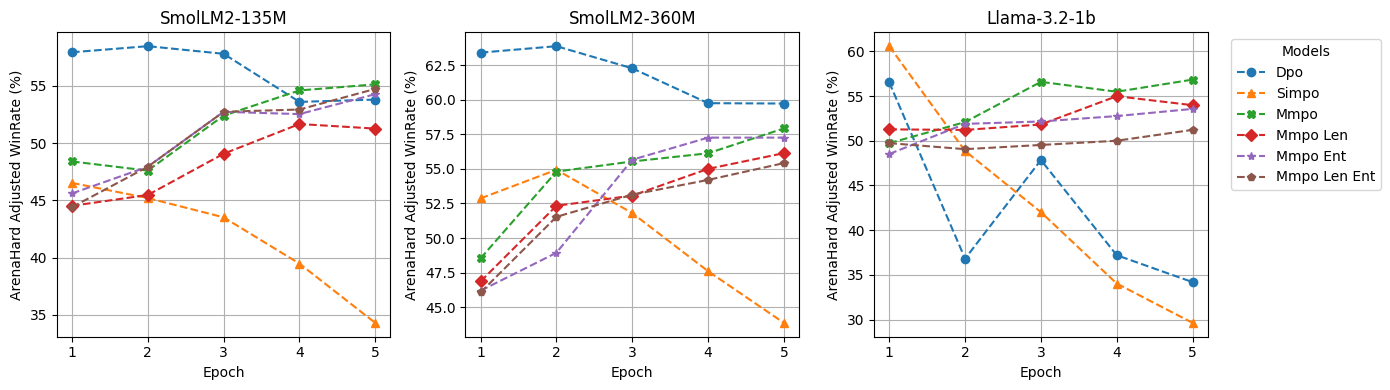

In [43]:
# Model names and markers
models = {
    "dpo": "o",           # Circle
    #"dpo-len": "s",      # Square
    "simpo": "^",         # Triangle Up
    # "simpo-len": "P",   # Plus (filled)
    "mmpo": "X",          # Cross (filled)
    "mmpo-len": "D",      # Diamond
    "mmpo-ent": "*",      # Star
    "mmpo-len-ent": "p",  # Pentagon
    # "sft": "h"          # Hexagon
}

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    winrates = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'135-{model}-epoch-{epoch}'
        if key in model_mappings_135m:
            model_id = model_mappings_135m[key].removeprefix("lm_harness_output_")
            winrates.append(arena_hard_winrate_135m[model_id])
        else:
            winrates.append(None)  # In case some data is missing, leaving gaps

    axs[0].plot(epochs, winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('ArenaHard Adjusted WinRate (%)')
axs[0].set_title('SmolLM2-135M')
axs[0].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[0].grid(True)


epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    winrates = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'360-{model}-epoch-{epoch}'
        if key in model_mappings_360m:
            model_id = model_mappings_360m[key].removeprefix("lm_harness_output_")
            winrates.append(arena_hard_winrate_360m[model_id])
        else:
            winrates.append(None)  # In case some data is missing, leaving gaps

    axs[1].plot(epochs, winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('ArenaHard Adjusted WinRate (%)')
axs[1].set_title('SmolLM2-360M')
axs[1].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[1].grid(True)


epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    winrates = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'llama_1b-{model}-epoch-{epoch}'
        if key in model_mappings_llama_1b:
            model_id = model_mappings_llama_1b[key].removeprefix("lm_harness_output_")
            winrates.append(arena_hard_winrate_llama1b[model_id])
        else:
            winrates.append(None)  # In case some data is missing, leaving gaps

    axs[2].plot(epochs, winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('ArenaHard Adjusted WinRate (%)')
axs[2].set_title('Llama-3.2-1b')
axs[2].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[2].grid(True)


plt.legend(title='Models', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("sft-360-135-llama1b-arenahard-win-rates-results.png", dpi=300)
plt.show()

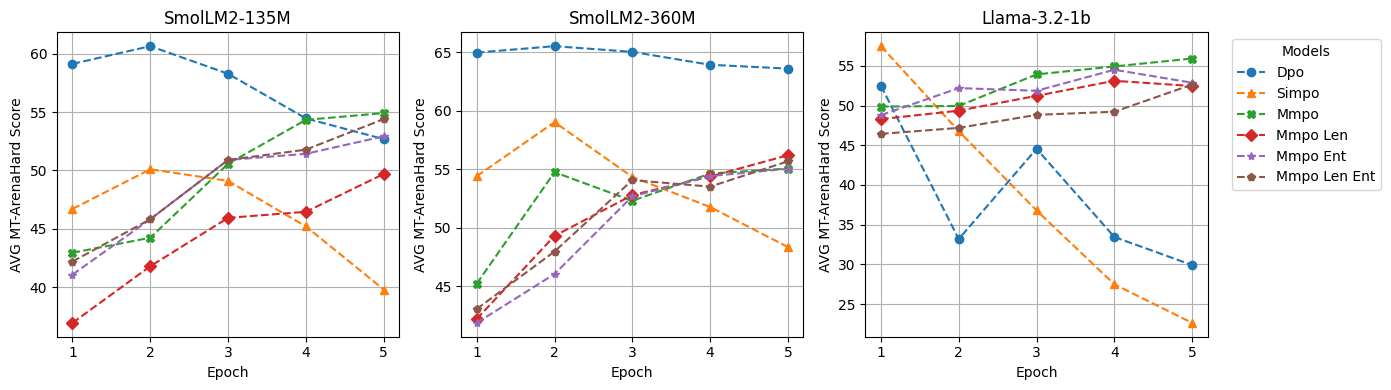

In [55]:
# Model names and markers
models = {
    "dpo": "o",           # Circle
    #"dpo-len": "s",      # Square
    "simpo": "^",         # Triangle Up
    # "simpo-len": "P",   # Plus (filled)
    "mmpo": "X",          # Cross (filled)
    "mmpo-len": "D",      # Diamond
    "mmpo-ent": "*",      # Star
    "mmpo-len-ent": "p",  # Pentagon
    # "sft": "h"          # Hexagon
}

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    avg_scores = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'135-{model}-epoch-{epoch}'
        if key in model_mappings_135m:
            model_id = model_mappings_135m[key].removeprefix("lm_harness_output_")
            avg_score = (arena_hard_winrate_135m[model_id] + mt_winrate_135m[model_id]) / 2.0
            avg_scores.append(avg_score)
        else:
            avg_scores.append(None)  # In case some data is missing, leaving gaps

    axs[0].plot(epochs, avg_scores, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('AVG MT-ArenaHard Score')
axs[0].set_title('SmolLM2-135M')
axs[0].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[0].grid(True)


epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    avg_scores = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'360-{model}-epoch-{epoch}'
        if key in model_mappings_360m:
            model_id = model_mappings_360m[key].removeprefix("lm_harness_output_")
            avg_score = (arena_hard_winrate_360m[model_id] + mt_winrate_360m[model_id]) / 2.0
            avg_scores.append(avg_score)
        else:
            avg_scores.append(None)  # In case some data is missing, leaving gaps

    axs[1].plot(epochs, avg_scores, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('AVG MT-ArenaHard Score')
axs[1].set_title('SmolLM2-360M')
axs[1].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[1].grid(True)


epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    avg_scores = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'llama_1b-{model}-epoch-{epoch}'
        if key in model_mappings_llama_1b:
            model_id = model_mappings_llama_1b[key].removeprefix("lm_harness_output_")
            avg_score = (arena_hard_winrate_llama1b[model_id] + mt_winrate_llama1b[model_id]) / 2.0
            avg_scores.append(avg_score)
        else:
            avg_scores.append(None)  # In case some data is missing, leaving gaps

    axs[2].plot(epochs, avg_scores, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('AVG MT-ArenaHard Score')
axs[2].set_title('Llama-3.2-1b')
axs[2].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[2].grid(True)


plt.legend(title='Models', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("sft-360-135-llama1b-avg-mt-arena-scores-results.png", dpi=300)
plt.show()

In [33]:
# Alpaca-Eval2 Scores.
alpaca_eval2_lc_winrates_smollm_360m = {
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1148': 64.01,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-575': 61.10,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-1723': 63.11,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2298': 59.86,
 'smollm2-360M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.00005-avg_logps_no-v2_checkpoint-2870': 58.96,
 'smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1148': 41.95,
 'smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1723': 39.81,
 'smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2298': 34.47,
 'smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-575': 35.47,
 'smollm2-360M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2870': 26.04,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2870': 58.92,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2298': 56.50,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1148': 51.56,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1723': 49.59,
 'smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-575': 41.39,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-575": 37.36,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1150": 44.25,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1725": 47.03,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2300": 51.00,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2870": 52.40,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-575": 38.53,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1150": 46.83,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1725": 52.81,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2296": 54.46,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2870": 53.18,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-575": 38.17,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1150": 45.41,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1725": 54.11,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2300": 56.54,
 "smollm2-360M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2870": 57.98,
}

alpaca_eval2_lc_winrates_smollm_135m = {
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1148': 55.27,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-575': 48.44,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-1723': 50.09,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-2298': 41.31,
 'smollm2-135M-orca_bin_ultra-offline-dpo-beta_0.01-lr_0.0001-avg_logps_no-v2_checkpoint-2870': 41.15,
 'smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1150': 29.64,
 'smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-1725': 21.91,
 'smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2300': 18.13,
 'smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-575': 24.69,
 'smollm2-135M-orca_bin_ultra-offline-simpo-beta_0.01-lr_0.0001-gamma-to-beta_1.6-avg_logps_no-v2_checkpoint-2870': 12.01,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2870': 56.81,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-2300': 53.26,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1150': 42.28,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-1725': 50.10,
 'smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-no-entropy_checkpoint-575': 41.53,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-575": 36.80,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1150": 40.94,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-1725": 48.38,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2300": 49.93,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v2-with-entropy_checkpoint-2870": 53.50,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-575": 39.01,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1150": 44.94,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-1725": 52.22,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2300": 49.81,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-no-entropy_checkpoint-2870": 51.94,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-575": 38.25,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1150": 43.72,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-1725": 49.10,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2300": 51.49,
 "smollm2-135M-orca_bin_ultra-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v2-with-entropy_checkpoint-2870": 52.95,
}

In [39]:
alpaca_eval2_lc_winrates_llama1b = {
"llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-446": 59.76,
"llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-892": 31.47,
"llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-1338": 28.95,
"llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-1784": 18.54,
"llama3.2-1b-offline-dpo-beta_0.01-lr_0.0005-avg_logps_no-v9_checkpoint-2225": 14.20,
"llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-446": 57.00,
"llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-892": 41.30,
"llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-1338": 31.74,
"llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-1784": 24.36,
"llama3.2-1b-offline-simpo-beta_0.01-lr_0.0005-gamma-to-beta_1.0-avg_logps_no-v9_checkpoint-2225": 15.22,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-2225": 58.54,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-1338": 56.84,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-1784": 58.27,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-892": 55.65,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-no-entropy_checkpoint-446": 55.48,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-2225": 60.21,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-1338": 59.60,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-1784": 59.94,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-892": 57.53,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-no-entropy_checkpoint-446": 54.28,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-2225": 55.58,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-1338": 55.51,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-1784": 52.95,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-892": 55.90,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_no-v9-with-entropy_checkpoint-446": 52.64,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-2225": 57.48,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-1338": 53.44,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-1784": 56.31,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-892": 55.71,
"llama3.2-1b-offline-mmpo-beta_0.01-lr_0.0005-reward_eps_0.9-avg_logps_yes-v9-with-entropy_checkpoint-446": 50.46,
}

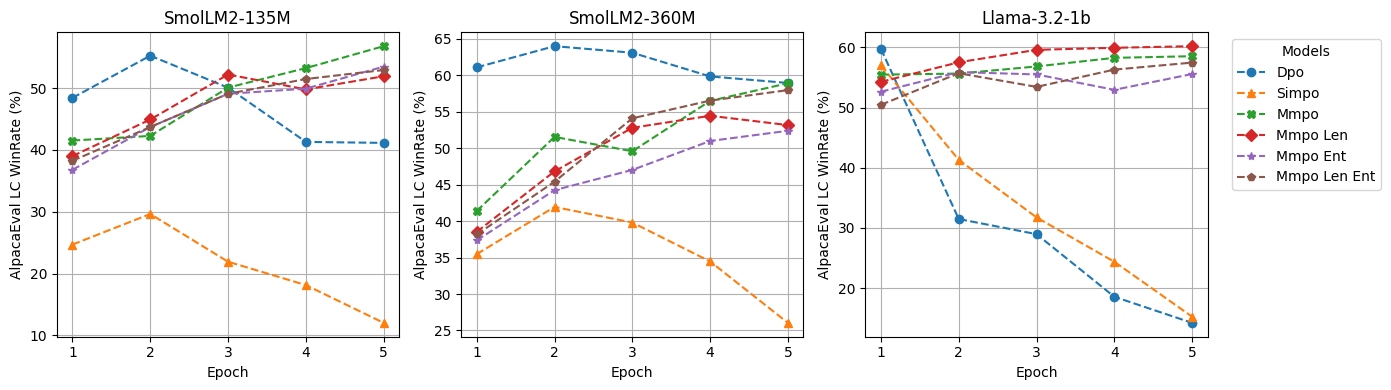

In [40]:
# Model names and markers
models = {
    "dpo": "o",           # Circle
    #"dpo-len": "s",      # Square
    "simpo": "^",         # Triangle Up
    # "simpo-len": "P",   # Plus (filled)
    "mmpo": "X",          # Cross (filled)
    "mmpo-len": "D",      # Diamond
    "mmpo-ent": "*",      # Star
    "mmpo-len-ent": "p",  # Pentagon
    # "sft": "h"          # Hexagon
}

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    winrates = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'135-{model}-epoch-{epoch}'
        if key in model_mappings_135m:
            model_id = model_mappings_135m[key].removeprefix("lm_harness_output_")
            winrates.append(alpaca_eval2_lc_winrates_smollm_135m[model_id])
        else:
            winrates.append(None)  # In case some data is missing, leaving gaps

    axs[0].plot(epochs, winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('AlpacaEval LC WinRate (%)')
axs[0].set_title('SmolLM2-135M')
axs[0].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[0].grid(True)


epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    winrates = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'360-{model}-epoch-{epoch}'
        if key in model_mappings_360m:
            model_id = model_mappings_360m[key].removeprefix("lm_harness_output_")
            winrates.append(alpaca_eval2_lc_winrates_smollm_360m[model_id])
        else:
            winrates.append(None)  # In case some data is missing, leaving gaps

    axs[1].plot(epochs, winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('AlpacaEval LC WinRate (%)')
axs[1].set_title('SmolLM2-360M')
axs[1].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[1].grid(True)


epochs = list(range(1, 6))  # Epochs from 1 to 5

for model, marker in models.items():
    winrates = []
    for epoch in range(1, 6):  # Epochs 1 to 5
        key = f'llama_1b-{model}-epoch-{epoch}'
        if key in model_mappings_llama_1b:
            model_id = model_mappings_llama_1b[key].removeprefix("lm_harness_output_")
            winrates.append(alpaca_eval2_lc_winrates_llama1b[model_id])
        else:
            winrates.append(None)  # In case some data is missing, leaving gaps

    axs[2].plot(epochs, winrates, marker=marker, label=model.replace('-', ' ').title(), linestyle='dashed')

# Styling the plot
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('AlpacaEval LC WinRate (%)')
axs[2].set_title('Llama-3.2-1b')
axs[2].set_xticks(epochs)  # Ensure we have ticks for all epochs including 0
axs[2].grid(True)


plt.legend(title='Models', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("sft-360-135-llama1b-AlpacaEval_LC-win-rates-results.png", dpi=300)
plt.show()